# **AP157 Machine Learning Lab Assignment** 
## Module 1: Regression -- Overfitting, Underfitting, and Cross-Validation

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This assignment is based on Chapter 8.11 of “Statistics, Data Mining, and Machine Learning in Astronomy” (SDMMLA) by Zeljko Ivezic et al.

### Student Information 

_Full Name (Last Name, First Name)_: Rangel, Jerico Miguel T.\
_Student No._: 2018-11666\
_Section_: WFU-WX

### Submission Information

_Date and Time Submitted (most recent upload)_: 5/25/2021 4:12 pm

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: JERICO MIGUEL TAPANG RANGEL** 

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/80

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

#### PART 1 - Generate data set *(20 points)*

1. Generate a toy data set with 100 regularly-spaced points and as described by Eq. 8.75-- a simple model where $x$ and $y$ satisfy the following:
$$ 0 \le x_i \le 3 $$
$$ y_i = x_i \sin(x_i) + \epsilon_i $$
where the noise is drawn from a normal distribution $\epsilon_i \sim \rm{N}(0, 0.1)$. *(10 points)*  

2. Plot your toy data set (Refer to Fig. 8.12 for comparison). *(10 points)*


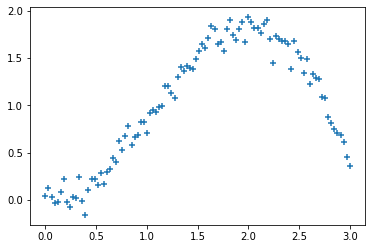

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

N = 100
x = np.linspace(0,3,N)
y = np.zeros(100)
error = np.random.normal(0.0,0.1,N)
 
for n in range(N):
  y[n] = x[n]*np.sin(x[n]) + np.random.choice(error)

plt.scatter(x,y,marker= "+")

To create the toy data set, we start with the x values using np.linspace from 0 to 3 for 100 data points. Afterwards, we define the error function using np.random.normal, with $mean = 0$ and $sigma = 0.1$. Using a simple for loop, we can now get the y values using the formula. Additionally I use np.random.choice for the error values just to add an extra layer of randomness. 

PART 2 - Apply cross-validation *(80 points)*

Recreate the top panel of Figure 8.14: rms error vs. polynomial degree for the training set and cross-validation set. To do this, you will perform the ff. steps:

1. Split the data set into training, cross-validation, and test sets with 50%, 25% and 25% ratio. You can use sklearn library's model_selection.train_test_split function [(link)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). *(20 pts.)*
2. Get the best-fit curve for polynomial degrees $d=0$ to 14 for the training and cross-validation sets. You can use numpy library's polyfit function [(link)](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). *(30 pts.)*
3. Get the rms error for each. *(10 pts.)*
4. Plot rms error against polynomial degree $d$. *(20 pts.)*


In [2]:
import sklearn.model_selection as sk

xtrain,x_ct,ytrain, y_ct = sk.train_test_split(x,y,test_size = 0.5)
xcross,xtest,ycross, ytest = sk.train_test_split(x_ct,y_ct,test_size = 0.5)

In splitting the data, we use scikit's train_test_split function to get x and y values for our training set. We do this again for the remainder of data denoted by $x_{ct}$ and $y_{ct}$ to get the cross validation and test sets.

In [3]:
curve1 = np.zeros((15,15))

for n in np.arange(0,15):
  poly = np.polyfit(xtrain,ytrain,n)
  shape = np.shape(poly)
  for m in np.arange(0,n+1):
    curve1[n,14-m] = poly[shape[0]-(m+1)]
  
p0 = np.poly1d(curve1[0,:])
p1 = np.poly1d(curve1[1,:])
p2 = np.poly1d(curve1[2,:])
p3 = np.poly1d(curve1[3,:])
p4 = np.poly1d(curve1[4,:])
p5 = np.poly1d(curve1[5,:])
p6 = np.poly1d(curve1[6,:])
p7 = np.poly1d(curve1[7,:])
p8 = np.poly1d(curve1[8,:])
p9 = np.poly1d(curve1[9,:])
p10 = np.poly1d(curve1[10,:])
p11 = np.poly1d(curve1[11,:])
p12 = np.poly1d(curve1[12,:])
p13 = np.poly1d(curve1[13,:])
p14 = np.poly1d(curve1[14,:])

To get the corresponding polynomial coefficients for each regression degree, we use np.polyfit on the training set. I devise a nested for loop that stores the polynomial coefficients to a 15 x 15 2d array.

Additionally, for confirmation I define the functions $p_0$ to $p_{14}$ to be able to visualize the polynomial fitting the training data set. Needless to say I was planning to make a loop for this but was unable to do so since I couldnt figure out how to fit functions/sequences into an array. These functions take the 1d polynomial from the coefficients stored in curve1.

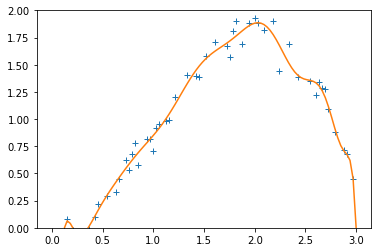

In [4]:
plt.ylim((0,2))
xd = np.linspace(0,3,100)
plt.plot(xtrain,ytrain,'+',xd,p14(xd))

Here is one of the sample plots I used to make sure I was on the right track.

In [6]:
from sklearn.metrics import mean_squared_error

rms = np.zeros(15)
rmsc = np.zeros(15)

for n in np.arange(0,15):
  p = np.poly1d(curve1[n,:])
  rms[n] = mean_squared_error(ytrain, p(xtrain), squared=False)
  rmsc[n] = mean_squared_error(ycross, p(xcross), squared=False)

In taking the root mean square of the deviations of the model from the actual values, we use scikit's mean_squared_error function. Here I run a for loop for all the degrees, and store the rms values for the training and cross validation sets in arrays.

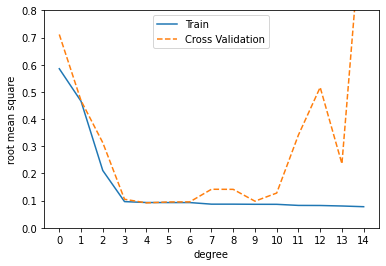

In [7]:
deg = np.arange(0,15)

plt.ylim((0,0.8))
plt.xticks(deg)
plt.xlabel("degree")
plt.ylabel("root mean square")
plt.plot(deg,rms,'-', label = "Train")
plt.plot(deg,rmsc,'--', label = "Cross Validation")
plt.legend(loc="best")

We can then plot the rms against the degree for both the training and cross validation sets. We can infer or observe that the lowest values for the cross validation set are found at around degree 3,4,5,6, and 9. Running the code for various data set error seeds, I have noticed that the smallest errors are found from degree 3 to as high as degree 11.

[0.09897032 0.09255159 0.09350575 0.09348529 0.10857115]


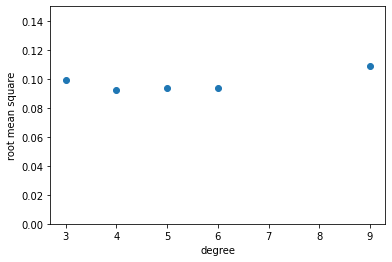

In [8]:
rmst = np.zeros(5)
vals = [3,4,5,6,9]
counter = 0
for n in vals:
  p = np.poly1d(curve1[n,:])
  rmst[counter] = mean_squared_error(ytest, p(xtest), squared=False)
  counter+=1

print(rmst)
plt.ylim((0,0.15))
plt.xticks(deg)
plt.xlabel("degree")
plt.ylabel("root mean square")
plt.scatter(vals,rmst)

Lastly, we evaluate the test error for each of the models that are worth looking at. It can be seen that the error at degree 4 is lowest for this particular data set. 